In [11]:
# 한국어 형태소 분석기 konlpy 설치하기
# !pip install konlpy

In [12]:
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
# %cd /content/drive/MyDrive/Colab Notebooks/클라우드2차딥러닝

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
# 이게 맞음
data = pd.read_csv('./data/review_before.csv')
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.columns = ['제품명', '닉네임', '나이', '피부타입', '성별', '평점','리뷰내용']
data

,제품명,닉네임,나이,피부타입,성별,평점,리뷰내용
0,리얼 히알루로닉 100 토너,큐피드,21세,복합성,여,5,웰라쥬 앰플이 유명해서 앰플 사용하다가 토너도 같이 사용해봤는데 역시나 너무 좋았습...
1,리얼 히알루로닉 100 토너,꿀품은고구마,31세,건성,여,5,여름철만 되면 붉게 달아오르는 피부에 어떻게하면 속건조도 잡고 붉은끼도 진정시킬수있...
2,리얼 히알루로닉 100 토너,캔디크러쉬,17세,지성,여,5,되게 촉촉하고 수분감이 장난 아닙니다 그래서 화장할 때 잘 쓰고 있어요 그리고 바르...
3,리얼 히알루로닉 100 토너,글로리#8UCr6C,32세,민감성,여,4,라이트한 사용감이지만 보습력이 있어서 여름에 건조한 피부가 쓰기 좋고 부담감이 없어...
4,리얼 히알루로닉 100 토너,글로리#fV2oGH,18세,건성,여,5,수분이 꽉 꽉 채워지는 느낌!! 다들 쓰세여 겨울에 무조건!!! 건조한 피부는 무조...
...,...,...,...,...,...,...,...
1888,펀더멘탈 앰플 미스트,yanse09,30세,민감성,여,3,가볍다는 평이 많네요! 저는 너무 무거워서 깜짝 놀랐어요!! 흡수가 안되는건 아닌데...
1889,펀더멘탈 앰플 미스트,풋사과청사과,26세,지성,여,3,"수분 부족형 지성, 얼굴에 열감이 잘 올라오는 피부입니다! 일단 속건조는 잘 잡아..."
1890,펀더멘탈 앰플 미스트,씩씩한부엉이,35세,복합성,여,3,스킨만 써보다 클레어스 올만이네요! 분사력 좋아요!!! 골고루 퍼지고 양도 적당히 ...
1891,펀더멘탈 앰플 미스트,레이아나,33세,건성,여,3,의외로 촉촉했어요 세안직후 뿌려주고있는데 앰플미스트라그런지 흡수하고나서도 건조하진 ...


In [4]:
# # 이건 로지스틱 회귀 정확도 좀 확인하려고 파일 불러옴
# data = pd.read_csv('./data/original_reviews.csv')
# # data.drop('Unnamed: 0', axis = 1, inplace = True)
# data.columns = ['리뷰아이디','제품명', '닉네임', '평점','리뷰내용']
# data

In [5]:
fi_review = data["리뷰내용"]
fi_review

0       웰라쥬 앰플이 유명해서 앰플 사용하다가 토너도 같이 사용해봤는데 역시나 너무 좋았습...
1       여름철만 되면 붉게 달아오르는 피부에 어떻게하면 속건조도 잡고 붉은끼도 진정시킬수있...
2       되게 촉촉하고 수분감이 장난 아닙니다 그래서 화장할 때 잘 쓰고 있어요 그리고 바르...
3       라이트한 사용감이지만 보습력이 있어서 여름에 건조한 피부가 쓰기 좋고 부담감이 없어...
4       수분이 꽉 꽉 채워지는 느낌!! 다들 쓰세여 겨울에 무조건!!! 건조한 피부는 무조...
                              ...                        
1888    가볍다는 평이 많네요! 저는 너무 무거워서 깜짝 놀랐어요!! 흡수가 안되는건 아닌데...
1889    수분 부족형 지성, 얼굴에 열감이 잘 올라오는 피부입니다!  일단 속건조는 잘 잡아...
1890    스킨만 써보다 클레어스 올만이네요! 분사력 좋아요!!! 골고루 퍼지고 양도 적당히 ...
1891    의외로 촉촉했어요 세안직후 뿌려주고있는데 앰플미스트라그런지 흡수하고나서도 건조하진 ...
1892    좋았던점2가지 전성분이 확인했는데  성분이 좋은편이더라구요  그래서 믿고뿌려봤고 저...
Name: 리뷰내용, Length: 1893, dtype: object

In [6]:
# 평점 기준
# 긍정 : 5, 4
# 중립 : 3
# 부정 : 2, 1

data['평점']

def rating_replace(rating) :
  if rating == 5 or rating == 4 : # 긍정은 2로 변경
    return 2
  elif rating == 3 : # 중립은 1으로 변경
    return 1
  else : # 부정은 0로 변경
    return 0

data['감성분석 결과'] = data['평점'].apply(rating_replace)
data

,제품명,닉네임,나이,피부타입,성별,평점,리뷰내용,감성분석 결과
0,리얼 히알루로닉 100 토너,큐피드,21세,복합성,여,5,웰라쥬 앰플이 유명해서 앰플 사용하다가 토너도 같이 사용해봤는데 역시나 너무 좋았습...,2
1,리얼 히알루로닉 100 토너,꿀품은고구마,31세,건성,여,5,여름철만 되면 붉게 달아오르는 피부에 어떻게하면 속건조도 잡고 붉은끼도 진정시킬수있...,2
2,리얼 히알루로닉 100 토너,캔디크러쉬,17세,지성,여,5,되게 촉촉하고 수분감이 장난 아닙니다 그래서 화장할 때 잘 쓰고 있어요 그리고 바르...,2
3,리얼 히알루로닉 100 토너,글로리#8UCr6C,32세,민감성,여,4,라이트한 사용감이지만 보습력이 있어서 여름에 건조한 피부가 쓰기 좋고 부담감이 없어...,2
4,리얼 히알루로닉 100 토너,글로리#fV2oGH,18세,건성,여,5,수분이 꽉 꽉 채워지는 느낌!! 다들 쓰세여 겨울에 무조건!!! 건조한 피부는 무조...,2
...,...,...,...,...,...,...,...,...
1888,펀더멘탈 앰플 미스트,yanse09,30세,민감성,여,3,가볍다는 평이 많네요! 저는 너무 무거워서 깜짝 놀랐어요!! 흡수가 안되는건 아닌데...,1
1889,펀더멘탈 앰플 미스트,풋사과청사과,26세,지성,여,3,"수분 부족형 지성, 얼굴에 열감이 잘 올라오는 피부입니다! 일단 속건조는 잘 잡아...",1
1890,펀더멘탈 앰플 미스트,씩씩한부엉이,35세,복합성,여,3,스킨만 써보다 클레어스 올만이네요! 분사력 좋아요!!! 골고루 퍼지고 양도 적당히 ...,1
1891,펀더멘탈 앰플 미스트,레이아나,33세,건성,여,3,의외로 촉촉했어요 세안직후 뿌려주고있는데 앰플미스트라그런지 흡수하고나서도 건조하진 ...,1


In [7]:
# 리뷰 내용 전처리
X = data['리뷰내용']
y = data['감성분석 결과']

In [8]:
# 라이브러리 불러오기
from konlpy.tag import Okt
okt = Okt()

In [9]:
# okt.tagset

In [10]:
list_ = []

for i in X:
  list_.append(okt.pos(i, join=True))

list_

[['웰라쥬/Noun',
  '앰플/Noun',
  '이/Josa',
  '유명해서/Adjective',
  '앰플/Noun',
  '사용/Noun',
  '하다가/Verb',
  '토너/Noun',
  '도/Josa',
  '같이/Adverb',
  '사용/Noun',
  '해봤는데/Verb',
  '역시/Noun',
  '나/Josa',
  '너무/Adverb',
  '좋았습니다/Adjective',
  'ㅠㅠ/KoreanParticle',
  '가벼운데/Adjective',
  '쫀쫀/Noun',
  '하고/Josa',
  '탱/Adverb',
  '글/Noun',
  '하/Suffix',
  '게/Josa',
  '수분/Noun',
  '잡아줘서/Verb',
  '너무/Adverb',
  '만족합니당/Adjective',
  '성분/Noun',
  '도/Josa',
  '착하고/Adjective',
  '인기/Noun',
  '가/Josa',
  '많은/Adjective',
  '이유/Noun',
  '를/Josa',
  '알겠어/Verb',
  '욥/Noun'],
 ['여름철/Noun',
  '만/Josa',
  '되면/Verb',
  '붉게/Adjective',
  '달아오르는/Verb',
  '피부/Noun',
  '에/Josa',
  '어떻/Modifier',
  '게/Noun',
  '하/Suffix',
  '면/Josa',
  '속/Modifier',
  '건조/Noun',
  '도/Josa',
  '잡고/Noun',
  '붉은/Adjective',
  '끼/Noun',
  '도/Josa',
  '진정/Noun',
  '시킬수있을까/Verb',
  '하다가/Verb',
  '이/Noun',
  '아이/Noun',
  '가/Josa',
  '히알루론산/Noun',
  '이/Josa',
  '많고/Adjective',
  '순하다/Adjective',
  '해서/Verb',
  '구매/Noun',
  '했는데/Verb',
  '역시/Noun',


In [11]:
def myTokenizer(text):
    d = pd.DataFrame(okt.pos(text), columns=['morph','tag'])
    d.set_index('tag', inplace=True)
    if ('Verb' in d.index) | ('Noun' in d.index) | ('Adjective' in d.index):
        return d.loc[d.index.intersection(['Verb','Noun','Adjective']),'morph'].values
    else :
        return []

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
#TF-IDF Vectorizer에 연결해주기
tfidf_pos = TfidfVectorizer(tokenizer=myTokenizer)
tfidf_pos.fit(X)
tfidf_pos.vocabulary_

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'웰라쥬': 6227,
 '앰플': 5591,
 '사용': 4339,
 '토너': 8148,
 '역시': 5903,
 '쫀쫀': 7528,
 '글': 868,
 '수분': 4651,
 '성분': 4564,
 '인기': 6448,
 '이유': 6418,
 '욥': 6151,
 '유명해서': 6260,
 '좋았습니다': 7217,
 '가벼운데': 100,
 '만족합니당': 2771,
 '착하고': 7606,
 '많은': 2816,
 '하다가': 8563,
 '해봤는데': 8765,
 '잡아줘서': 6830,
 '알겠어': 5527,
 '여름철': 5890,
 '피부': 8463,
 '게': 544,
 '건조': 422,
 '잡고': 6795,
 '끼': 1086,
 '진정': 7456,
 '이': 6331,
 '아이': 5340,
 '히알루론산': 9101,
 '구매': 734,
 '물': 3177,
 '타입': 8088,
 '한번': 8654,
 '때': 2452,
 '덧': 1931,
 '양': 5648,
 '가성': 133,
 '비': 4034,
 '최고': 7887,
 '레이저': 2590,
 '시술': 4797,
 '자주': 6709,
 '가지': 149,
 '신분': 4881,
 '되면': 2070,
 '달아오르는': 1753,
 '시킬수있을까': 4855,
 '해서': 8773,
 '했는데': 8872,
 '바르고': 3369,
 '바르면': 3407,
 '되고': 2037,
 '받거나': 3469,
 '쉽게': 4710,
 '해보세요': 8742,
 '붉게': 4000,
 '붉은': 4011,
 '많고': 2789,
 '순하다': 4681,
 '역시네요': 5904,
 '촉촉한': 7822,
 '마를': 2669,
 '어느새': 5660,
 '촉촉해져있어요': 7853,
 '같아요': 319,
 '건조해지는': 490,
 '촉촉하고': 7797,
 '아닙니다': 5279,
 '있어요': 6626,
 '따갑지도': 2402,
 '좋습니다': 7137

In [13]:
len(tfidf_pos.vocabulary_)

9123

In [14]:
# 실제 문장에 단어를 토큰값으로 변환해주는 작업 진행 : 8분정도 걸림
X_trains = tfidf_pos.transform(X)

In [15]:
X_trains

<1893x9123 sparse matrix of type '<class 'numpy.float64'>'
	with 64591 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trains, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1514, 9123), (379, 9123), (1514,), (379,))

In [48]:
# 로지스틱 회귀모델 - 머신러닝 모델 들어간 곳
# 8/29 랜덤 포레스트 모델 부분 갈아 끼울 수 있음
from  sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [19]:
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)  # 5-폴드 교차 검증

# 교차 검증 결과 출력
print("교차 검증 점수: ", cv_scores)
print("평균 교차 검증 점수: {:.2f}".format(cv_scores.mean()))

교차 검증 점수:  [0.70627063 0.74257426 0.74257426 0.75577558 0.74172185]
평균 교차 검증 점수: 0.74


In [20]:
lr.score(X_train, y_train)

0.9372523117569352

In [21]:
lr.score(X_test, y_test)

0.7467018469656992

In [22]:
# logi활용
# predict_proba : 각 클래스별 불확실성 확률 -> 예측확률을 정답별로 표시
# target_names = ['부정', '중립' ,'긍정']
target_names = np.array(["부정", "중립", "긍정"])
review = ['이 화장품은 촉촉해서 건성 피부를 가지신 분이라면 좋을것 같아요']
vect_review = tfidf_pos.transform(review) # 토큰화 변환 진행 코드
pre = lr.predict(vect_review)
print(f"{review[0]} 문장은 {lr.predict_proba(vect_review).max()*100:.2f}%로 {target_names[pre[0]]} 리뷰입니다!")

이 화장품은 촉촉해서 건성 피부를 가지신 분이라면 좋을것 같아요 문장은 52.42%로 긍정 리뷰입니다!


### 랜덤 포레스트

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns  # Seaborn을 import 합니다.


In [49]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# rf_model = RandomForestClassifier()
# rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
rf_model = RandomForestClassifier() # 하이퍼 파라미터 조절 X / 기본 모델

In [25]:
# 교차검증 - 예상 성능 확인해보기
from sklearn.model_selection import cross_val_score

rs = cross_val_score(rf_model, X_train, y_train, cv = 5)
print(rs)
print(rs.mean())

[0.68646865 0.7359736  0.68646865 0.72607261 0.73509934]
0.7140165672196359


In [26]:
# 모델 학습 및 평가
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
rf_model.score(X_train, y_train)

1.0

In [28]:
rf_model.score(X_test, y_test)

0.7361477572559367

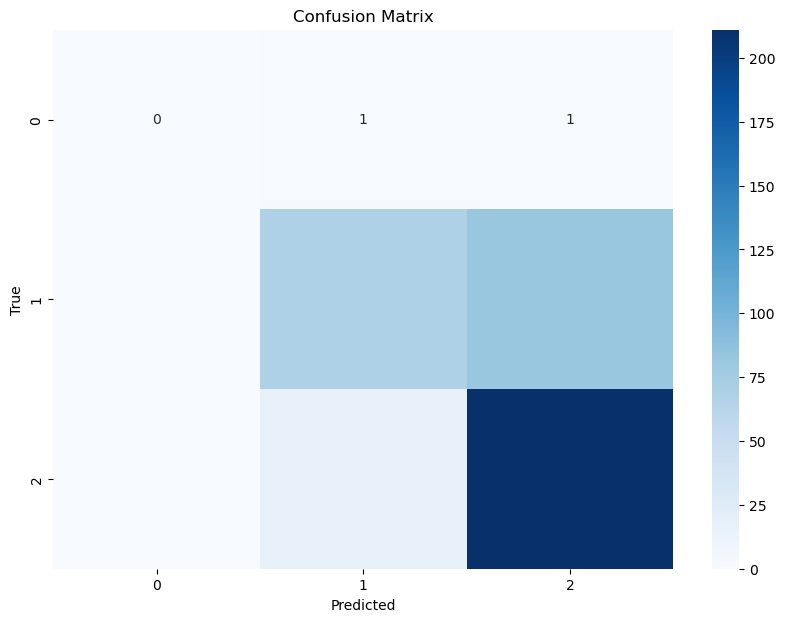

In [29]:
# 예측
y_pred = rf_model.predict(X_test)

# 혼동 행렬 생성
conf_matrix = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# 하이퍼 파라미터 조합찾기
from sklearn.model_selection import GridSearchCV

In [31]:
# 하이퍼 파라미터 조절 이때 사용하는건 교차검증 점수
param = { 'n_estimators' : [500, 1000, 1500, 2000, 2500], 
           # 트리의 갯수 갯수가 많을수록 시간이 오래걸림
          'max_depth': range(1,6), # 트리의 최대 깊이 최대 깊이는 5를 안넘는게 좋음...
          #'min_samples_split': range(1,6),
          #'min_samples_leaf' : range(1,6)
        }

grid_model = GridSearchCV(rf_model, param, n_jobs=-1, cv = 5)

In [32]:
grid_model.fit(X_train, y_train) #시간 좀 걸림

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 6),
                         'n_estimators': [500, 1000, 1500, 2000, 2500]})

In [33]:
print(f" 최적 교차검증 점수 : {grid_model.best_score_}") # 최적 파라미터로 찾은 교차검증 점수
print(f" 최적 교차검증 파라미터 목록 : {grid_model.best_params_}") # 최적 파라미터 목록

 최적 교차검증 점수 : 0.586525473739427
 최적 교차검증 파라미터 목록 : {'max_depth': 5, 'n_estimators': 500}


In [34]:
best_model = grid_model.best_estimator_ # 최적 모델 만들기

In [35]:
best_model.fit(X_train, y_train) # 최적 모델 학습

RandomForestClassifier(max_depth=5, n_estimators=500)

In [36]:
best_model.score(X_train, y_train) # 최적 모델 훈련 점수

0.5858652575957728

In [37]:
best_model.score(X_test, y_test) # 최적 모델 평가 점수

0.5989445910290238

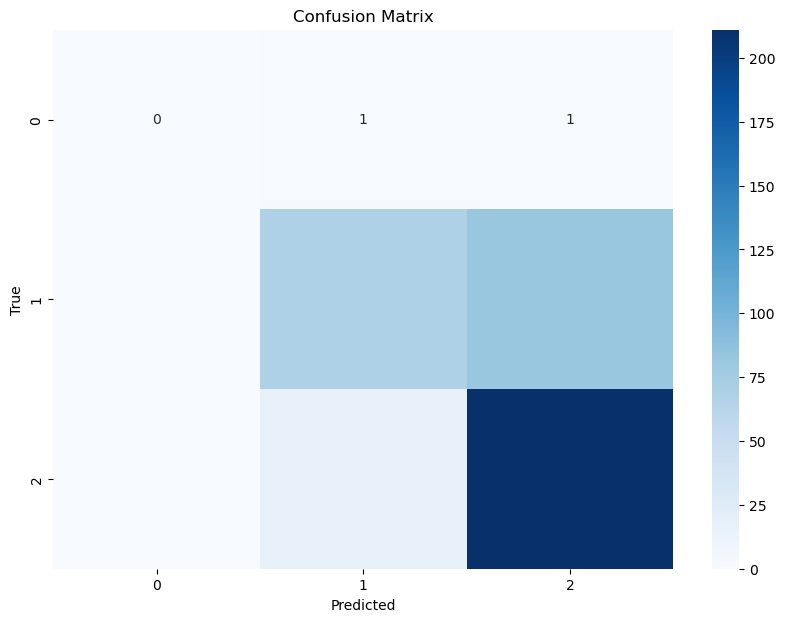

In [38]:
# 예측
y_pred = rf_model.predict(X_test)

# 혼동 행렬 생성
conf_matrix = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# rf 활용
# predict_proba : 각 클래스별 불확실성 확률 -> 예측확률을 정답별로 표시
# target_names = ['부정', '중립' ,'긍정']
target_names = np.array(["부정", "중립", "긍정"])
review = ['이 화장품은 촉촉해서 건성 피부를 가지신 분이라면 좋을것 같아요']
vect_review = tfidf_pos.transform(review) # 토큰화 변환 진행 코드
pre = rf_model.predict(vect_review)
print(f"{review[0]} 문장은 {rf_model.predict_proba(vect_review).max()*100:.2f}%로 {target_names[pre[0]]} 리뷰입니다!")

이 화장품은 촉촉해서 건성 피부를 가지신 분이라면 좋을것 같아요 문장은 65.00%로 긍정 리뷰입니다!


In [40]:
# # rf 활용
# # predict_proba : 각 클래스별 불확실성 확률 -> 예측확률을 정답별로 표시
# # target_names = ['부정', '중립' ,'긍정']
# target_names = np.array(["부정", "중립", "긍정"])
# review = [fi_review]
# vect_review = tfidf_pos.transform(review) # 토큰화 변환 진행 코드
# pre = rf_model.predict(vect_review)
# print(f"{review} 문장은 {rf_model.predict_proba(vect_review).max()*100:.2f}%로 {target_names[pre]} 리뷰입니다!")

In [41]:
pre1 = rf_model.predict(X_test)
pre1

array([2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,

In [42]:
translated_pre1 = target_names[pre1]
translated_pre1

array(['긍정', '중립', '긍정', '긍정', '긍정', '긍정', '긍정', '중립', '긍정', '긍정', '중립',
       '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '중립', '긍정', '긍정', '긍정',
       '긍정', '긍정', '긍정', '중립', '중립', '긍정', '긍정', '긍정', '중립', '긍정', '긍정',
       '중립', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '중립', '긍정', '중립',
       '긍정', '긍정', '중립', '긍정', '중립', '긍정', '중립', '긍정', '긍정', '긍정', '긍정',
       '긍정', '긍정', '중립', '긍정', '긍정', '중립', '중립', '긍정', '긍정', '중립', '긍정',
       '중립', '긍정', '긍정', '긍정', '중립', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '중립', '긍정', '긍정', '긍정', '긍정', '중립', '중립', '긍정', '긍정', '긍정', '중립',
       '긍정', '긍정', '긍정', '중립', '긍정', '중립', '긍정', '긍정', '긍정', '긍정', '긍정',
       '긍정', '중립', '긍정', '긍정', '중립', '긍정', '긍정', '긍정', '중립', '긍정', '긍정',
       '긍정', '중립', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정', '긍정',
       '중립', '긍정', '긍정', '중립', '중립', '긍정', '긍정', '긍정', '중립', '중립', '긍정',
       '긍정', '중립', '중립', '긍정', '중립', '긍정', '중립', '긍정', '중립', '긍정', '긍정',
       '긍정', '중립', '긍정', '긍정', '긍정', '긍정', '긍정', '긍

In [43]:
# 딥러닝 모델 - 아직 테스트 중 건드리지 말것.

In [ ]:
# X_len = [len(doc) for doc in X]

In [ ]:
# X_len

In [ ]:
# print('최대값 : ', max(X_len))
# print('최소값 : ', min(X_len))
# print('평균값 : ', np.mean(X_len))
# print('중앙값 : ', np.median(X_len))

In [ ]:
# # 길이에 해당하는 뉴스 기사 갯수 파악
# # 데이터의 밀도 확인 -> 히스토그램
# # X축 : 뉴스 길이 구간별 표시
# # y축 : 뉴스 기사 개수
# plt.hist(X_len, bins = 20)
# plt.xlabel('news_len')
# plt.ylabel('news_cnt')
# plt.ylim(0, 900)
# plt.show()

In [ ]:
# np_X = np.array(X_trains)

In [ ]:
# np_X.ndim

In [ ]:
# np_X

In [ ]:
# X_trains.dtype

In [ ]:
# type(X_trains)

In [ ]:
# # 희소 행렬인 np_X에 들어 있는 데이터를 180의 길이로 맞춰주자
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# X_train = pad_sequences(np_X, maxlen = 180)

In [ ]:
# X_train.info()

In [ ]:
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Embedding, LSTM

In [ ]:
# # 모델 생성하기
# model = Sequential()

# # 임베딩 레이어는 첫번째 층에 사용한다. 희소표현(ex: 1, 2, 3, 0) -> 밀집표현(실수)
# # input_dim : 데이터 내에서 사용할 단어의 최대 갯수(사용할 단어의 수)
# # output_dim : 임베딩 층을 통과한 후 생성된 실수의 갯수(임베딩 층의 차원)
# model.add(Embedding(input_dim = 1000, output_dim = 50))
# model.add(LSTM(512, return_sequences=True))
# model.add(LSTM(256, return_sequences=True))
# model.add(LSTM(128, return_sequences=True))
# model.add(LSTM(64))

# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(3, activation = 'softmax'))

# model.summary()

In [88]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# model.fit(X_train, y_train, validation_split = 0.2, epochs = 40, batch_size = 128)